In [32]:
import sys
import inspect
from pathlib import Path
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

import pandas as pd
notebook_path = Path(os.getcwd())
module_path = str(notebook_path.parent)
sys.path.append(module_path)



from torch.utils.data import DataLoader
from dataloaders.json_loader import JsonDataset

In [60]:
os.listdir(data_root)

['bravura.tex',
 'bravura.md',
 'eulenberg_et_al_2017_darkfield',
 'icpr2020_pollen',
 'hussain_et_al_2019',
 'colocalization_benchmark',
 'tang_et_al_2019',
 'image_json_pairs.jsonl',
 'nirschl_unpub_fluorescence',
 'burgess_et_al_2024_texture',
 'eulenberg_et_al_2017_epifluorescence',
 'burgess_et_al_2024_eccentricity',
 'burgess_et_al_2024_contour',
 'burgess_et_al_2024',
 'kather_et_al_2016',
 'acevedo_et_al_2020',
 'bravura.pdf',
 'wong_et_al_2022',
 'nirschl_et_al_2018',
 'bravura.feather',
 'held_et_al_2010',
 'eulenberg_et_al_2017_brightfield',
 'jung_et_al_2022']

In [61]:


DATASETS = [
    'eulenberg_et_al_2017_darkfield',
     'icpr2020_pollen',
     'hussain_et_al_2019',
     'colocalization_benchmark',
     'tang_et_al_2019',
     'image_json_pairs.jsonl',
     'nirschl_unpub_fluorescence',
     'burgess_et_al_2024_texture',
     'eulenberg_et_al_2017_epifluorescence',
     'kather_et_al_2016',
     'acevedo_et_al_2020',
     'wong_et_al_2022',
     'nirschl_et_al_2018',
     'held_et_al_2010',
     'eulenberg_et_al_2017_brightfield',
     'jung_et_al_2022']

data_root ="/pasteur/data/jnirschl/datasets/biovlmdata/data/processed/"
split     ="validation"
custom_metadata_list = []
limit = 10
for datasets_ in DATASETS:

    dataset_dict              = {}
    dataset_dict["data_path"] = Path(data_root) /datasets_ 
    dataset_dict["dataset"] =  JsonDataset(dataset_path = dataset_dict["data_path"],split=split, limit=10)

    for i,data_point in enumerate(dataset_dict["dataset"]): 
        data_point["metadata"]['name'] = dataset_dict["dataset"].path   / data_point["metadata"]['name']
        data_point["custom_metadata"]["name"] = str(data_point["metadata"]['name'])
        custom_metadata_list.append(data_point["custom_metadata"])
        if  i == limit:
            break  # Only taking the first data point from each dataset

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(custom_metadata_list)
          
                
       



Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/eulenberg_et_al_2017_darkfield/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/icpr2020_pollen/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/hussain_et_al_2019/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/colocalization_benchmark/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/tang_et_al_2019/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/image_json_pairs.jsonl/validation initilized with 
 0  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/nirschl_unpub_fluorescence/validation initilized with 
 10  datapoints
Dataset /pasteur/data/jnirschl/datasets/biovlmdata/data/processed/burgess_

In [62]:
df = df.sort_values(['domain','dataset_name',],ascending=False)



In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def create_image_collage(
    df,
    column_name, 
    collage_size=(17, 10), 
    image_size=(100, 100),
    save_path=None):
    """
    Create a collage of all the images stored in a DataFrame column.

    Parameters:
        df (DataFrame): Input DataFrame.
        column_name (str): Name of the column containing image paths or encoded images.
        collage_size (tuple): Size of the collage in terms of rows and columns.
        image_size (tuple): Size to which images will be resized.

    Returns:
        None
    """
    # Calculate number of rows and columns for the collage
    num_rows, num_cols = collage_size
    total_images = num_rows * num_cols

    # Calculate the aspect ratio for the images
    aspect_ratio = image_size[0] / image_size[1]

    # Create a figure and axis with adjusted spacing
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14,20), gridspec_kw={'wspace': 0, 'hspace': 0})

    # Flatten the axis array if it's not already flattened
    if not isinstance(axs, np.ndarray):
        axs = np.array(axs)

    # Loop through the images and plot them on the axis
    for i in range(min(len(df[column_name]), total_images)):
        img_path = df[column_name].iloc[i]  # Assuming column contains image paths
        img = Image.open(img_path)
        img = img.resize(image_size)  # Resize the image
        ax = axs[i // num_cols, i % num_cols]
        ax.imshow(img)
        ax.set_aspect(aspect_ratio)  # Set aspect ratio
        ax.axis('off')

    # Hide any remaining empty subplots
    for i in range(len(df[column_name]), total_images):
        ax = axs[i // num_cols, i % num_cols]
        ax.axis('off')
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path + ".pdf", format='pdf', dpi=300)
        plt.savefig(save_path + ".png", format='png', dpi=300)
        print(f"Collage saved as {save_path}")
    plt.show()
    
    

# Example usage:
# Assuming df is your DataFrame with column_name as the column containing image paths
# create_image_collage(df, 'image_column_name')


Collage saved as out


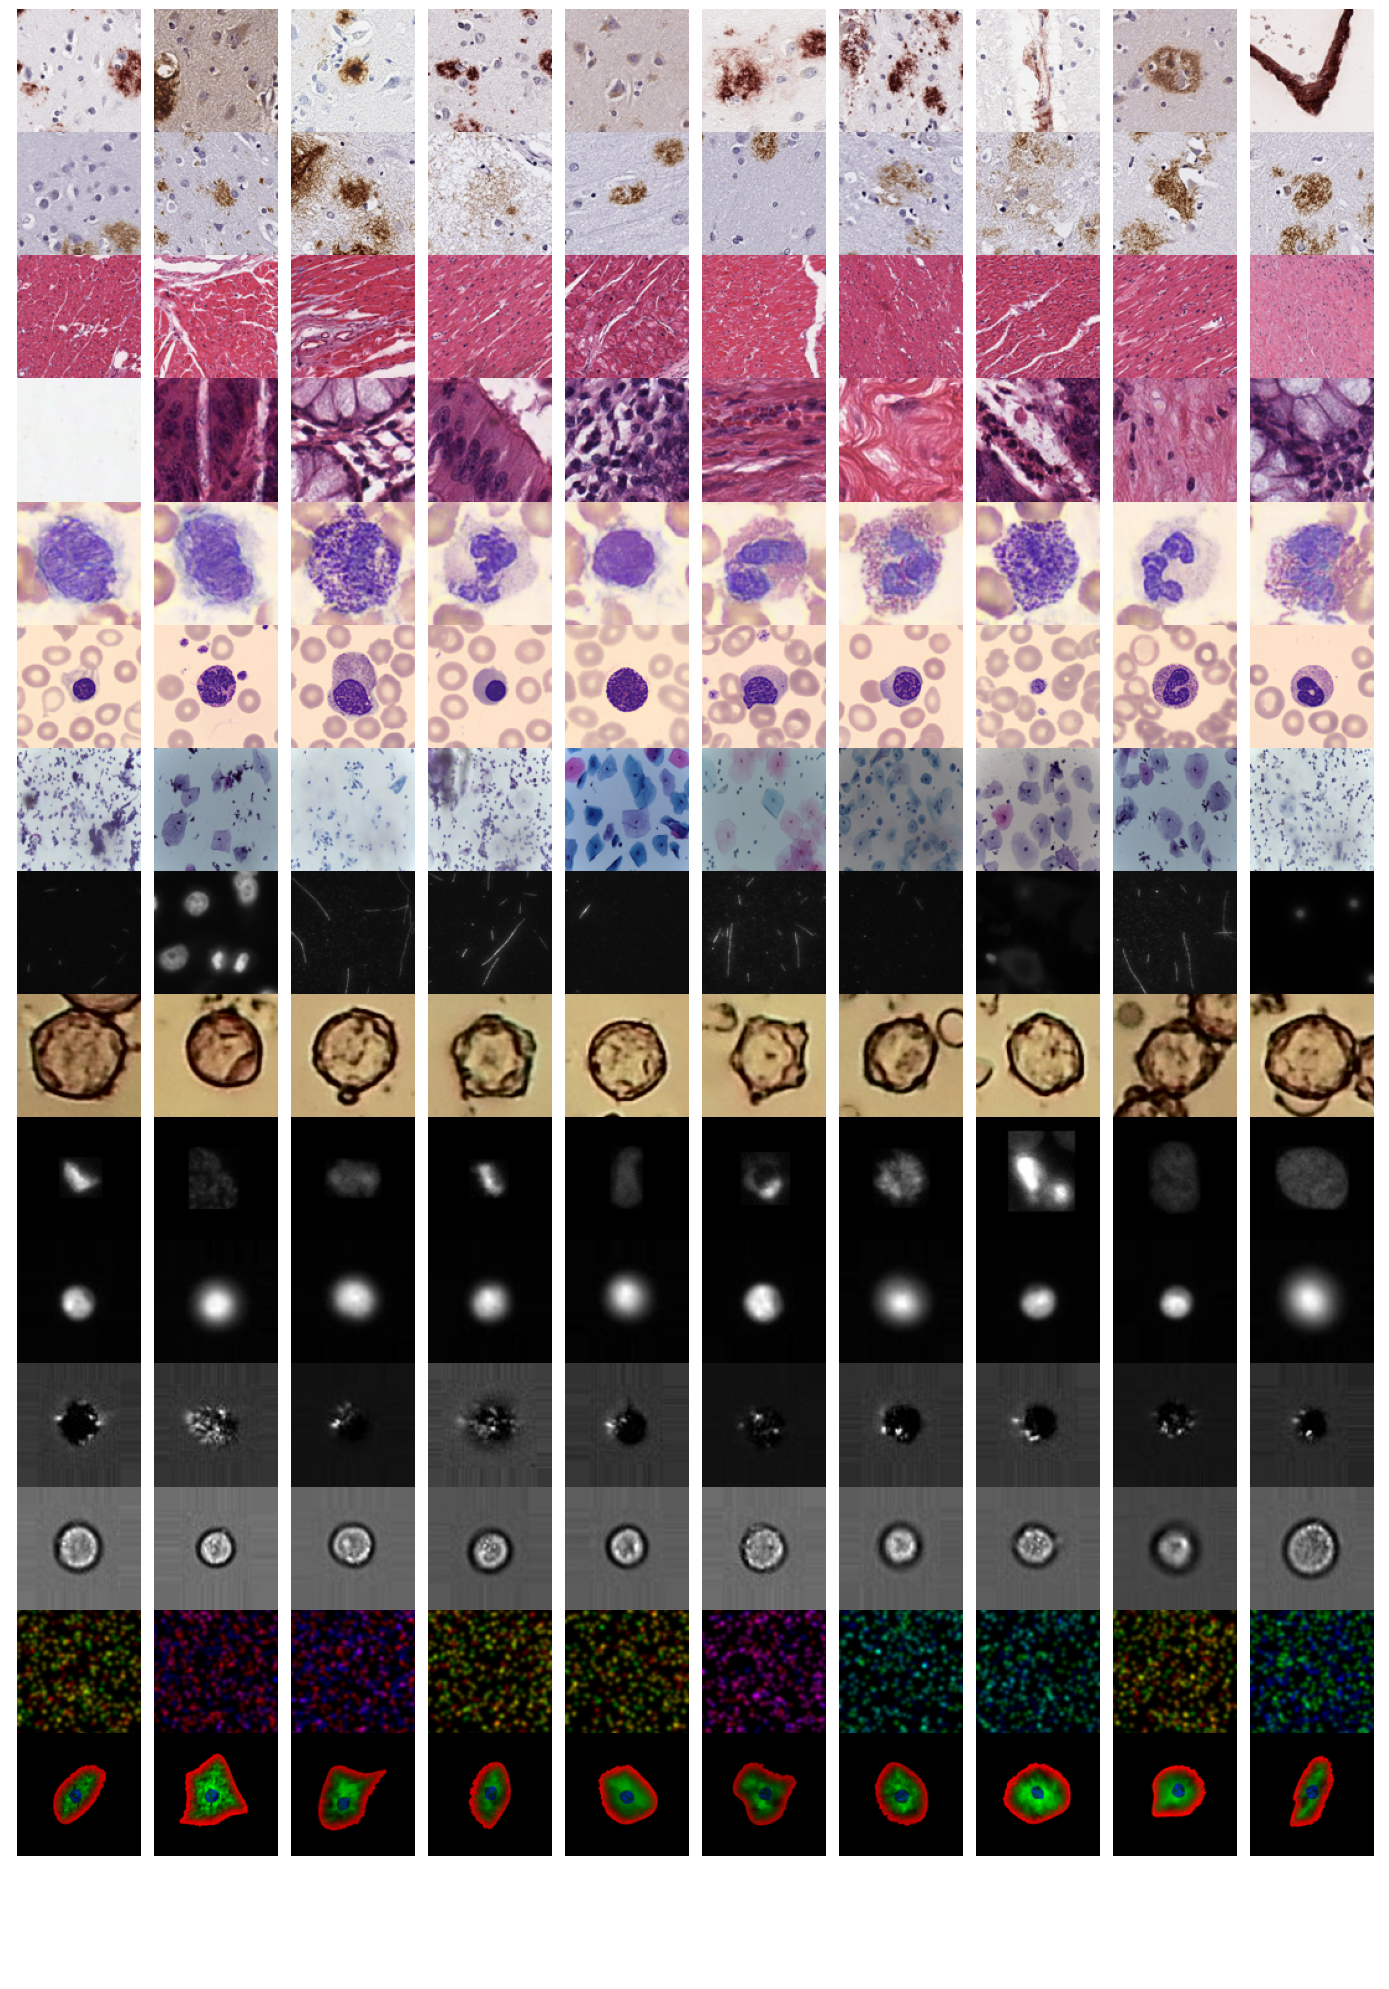

In [91]:
create_image_collage(df,"name",(len(DATASETS),limit),save_path="out")